In [13]:
import os
import sys
#from stocker import Stocker
%config IPCompleter.greedy=True
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import pandas_datareader as pdr
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
from matplotlib import style
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
#Importing metrics for the accuracy
from sklearn.metrics import accuracy_score

In [14]:
pwd

'/Users/josh/Desktop/HealthcareData'

In [15]:
cd desktop/HealthcareData

[Errno 2] No such file or directory: 'desktop/HealthcareData'
/Users/josh/Desktop/HealthcareData


In [16]:
REGN_df = pd.read_csv('Regn2.csv')
REGN_df.head(22)

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/4/19,313.049988,315.940002,310.739990,311.040009,311.040009,632800
1,11/5/19,323.359985,344.100006,322.109985,332.600006,332.600006,2345400
2,11/6/19,331.369995,333.279999,324.269989,324.489990,324.489990,1017500
3,11/7/19,329.179993,333.720001,325.619995,326.390015,326.390015,952300
4,11/8/19,327.519989,342.470001,327.029999,341.790009,341.790009,1106100
5,11/11/19,340.339996,344.989990,338.709991,344.279999,344.279999,611900
6,11/12/19,344.000000,349.940002,341.359985,348.410004,348.410004,905400
7,11/13/19,346.329987,349.630005,341.820007,348.299988,348.299988,1009400
8,11/14/19,349.799988,350.000000,337.029999,338.390015,338.390015,1029600
9,11/15/19,340.950012,349.859985,338.709991,344.869995,344.869995,912200


#Prediction 

In [17]:
#Using LSTM

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset
dataframe = read_csv('Regn2.csv', usecols=[5], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
look_back = 3
trainX, trainY = create_dataset(dataset, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# create and fit the LSTM network
#trainX


In [6]:
model = Sequential()
model.add(LSTM(6, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
81/81 [==============================] - 1s 11ms/step - loss: 0.1100
Epoch 2/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 3/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 4/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 5/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0133
Epoch 6/100
81/81 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 8/100
81/81 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 9/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 10/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 11/100
81/81 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 12/100
81/81 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 13/100
81/81 [================

In [7]:
# make predictions
trainPredict = model.predict(trainX[-1].reshape(1,1,3))
#testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
print(trainPredict)

[[492.8742]]


In [10]:
for pred in prediction:
    print(pred)

402.8947064088054
403.7276419324092
402.18242808811976
405.0525013118937
402.5724300056604
409.87299808300463
447.8680840123788
457.420027147369
469.85235741208027
442.914681329923
459.53607618762135
477.2818043519512
470.82520805136613
509.2092247165183
499.00544153769795


In [9]:
#Using Linear Regression for Regeneron Inc. 

forecast_time = int(15) # write number of predicitons that you want to make e.g 5,10,15 etc.
#Repalce Delta_df with dataframe of your desired company whose prediciton you want to make 
LR_df=REGN_df[['Open','High','Low','Close','Adj Close','Volume']].copy()  # 
#LR_df=Regn_df.iloc[:,1:].copy()

#Replace High with the column that you want to predict
LR_df['prediction'] = LR_df['High'].shift(-1)
LR_df.dropna(inplace=True)
X1 = np.array(LR_df.drop(['prediction'], 1))
Y1 = np.array(LR_df['prediction'])
X2 = preprocessing.scale(X1)
X_prediction = X2[-forecast_time:]
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y1, test_size=1)
clf = LinearRegression()
clf.fit(X_train, Y_train)
prediction = (clf.predict(X_prediction))



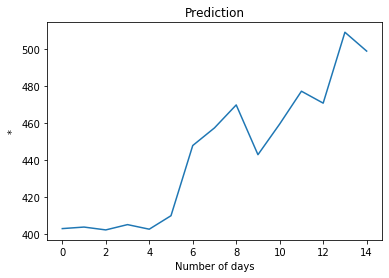

In [11]:
plt.title("Prediction")
plt.xlabel("Number of days")

#Replace * with the column that you want to predict
plt.ylabel("*");
plt.plot(prediction)
plt.show()

In [12]:
#we need to create the dataset of x and y which is the two data set we going to take to predict the model
#so we have to take the date and we taking the "Close" cloumn
dates = []
prices = []
REGN_df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
84,3/6/20,477.290009,496.98999,477.0,494.429993,494.429993,1130700
